In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Covid19 = pd.read_csv('C:\\Users\\HP\\Desktop\\Gokila\\DS MiniProject\\time_series_covid_19_confirmed.csv')
Covid19.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


# Section 1:Drop ‘Lat’ & ‘Long’ columns. Grouped the data with ‘Country/Region ‘using sum as an aggregate function.

In [3]:
Covid19.drop(columns=['Lat','Long'],inplace=True)

In [4]:
Covid19_grouped = Covid19.groupby('Country/Region').sum()
Covid19_grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
Albania,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
Algeria,0,0,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
Andorra,0,0,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
Angola,0,0,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


# Section2:Visualize the data for India, China & US countries

In [5]:
Covid19_grouped.reset_index(inplace=True)
Covid19_grouped.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,Albania,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,Algeria,0,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,Andorra,0,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,Angola,0,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [6]:
df1 = pd.melt(Covid19_grouped,
              id_vars='Country/Region',var_name='Days',value_name='Confirmed Cases')

In [7]:
df1.head()

,Country/Region,Days,Confirmed Cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [8]:
india_rate = df1[df1['Country/Region']=='India']
india_rate['Days'] = pd.to_datetime(india_rate['Days'])
ir_india = india_rate.groupby('Days').sum()
infection_india = ir_india.diff()
infection_india = infection_india['Confirmed Cases'].max()

<ipython-input-8-256e8bc2ae87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_rate['Days'] = pd.to_datetime(india_rate['Days'])


In [9]:
us_rate = df1[df1['Country/Region']=='US']
us_rate['Days'] = pd.to_datetime(us_rate['Days'])
us_india = us_rate.groupby('Days').sum()
infection_us = us_india.diff()
infection_us = infection_us['Confirmed Cases'].max()

<ipython-input-9-7ea3659d9e5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_rate['Days'] = pd.to_datetime(us_rate['Days'])


In [10]:
china_rate = df1[df1['Country/Region']=='China']
china_rate['Days'] = pd.to_datetime(china_rate['Days'])
china_india = china_rate.groupby('Days').sum()
infection_china = china_india.diff()
infection_china = infection_china['Confirmed Cases'].max()

<ipython-input-10-2f4e1f97e161>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_rate['Days'] = pd.to_datetime(china_rate['Days'])


# Create a New Data Frame name ‘Corona Data’ with ‘Country/Region’ as an index and ‘max_infection_rate’ as a column

In [11]:
data = {'Country/Region':['India','US','China'], 'max_infection_rate':[infection_india,infection_us,infection_china]}
Corona_Data = pd.DataFrame(data)

In [12]:
Corona_Data.set_index('Country/Region',inplace=True)
Corona_Data

,max_infection_rate
Country/Region,
India,66999.0
US,77255.0
China,15136.0


# Section 3: World happiness report dataset

In [13]:
happiness = pd.read_csv('C:\\Users\HP\\Desktop\Gokila\\DS MiniProject\\worldwide_happiness_report.csv')
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [14]:
#Drop 'Overall rank', 'Score', 'Generosity', 'Perceptions of corruption' columns. Set ‘Country or region’ column as Index

In [15]:
happiness.drop(columns=['Overall rank','Score','Generosity','Perceptions of corruption'],axis=1,inplace=True)
happiness.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


# Create a DataFrame named ‘data’ by merging ‘happiness_report’ with ‘Corona Data’ and find correlation among all variables

In [16]:
happiness.rename(columns={'Country or region': 'Country/Region'},inplace=True)
happiness.head()

,Country/Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [17]:
happiness.set_index('Country/Region',inplace=True)
happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [18]:
Corona_Data.head()

,max_infection_rate
Country/Region,
India,66999.0
US,77255.0
China,15136.0


In [19]:
DataFrame = pd.merge(Corona_Data,happiness, left_on='Country/Region', right_on='Country/Region')
DataFrame.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,,
India,66999.0,0.755,0.765,0.588,0.498
China,15136.0,1.029,1.125,0.893,0.521


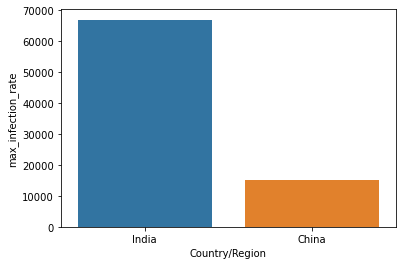

In [20]:
#Relationship between India and China overall Cases:
sns.barplot(x=DataFrame.index,y=DataFrame['max_infection_rate']);

# Section 4: Visualization using Folium Map

In [21]:
#Create a DataFrame (named it data2) by adding the 
#Lat & Long information available at COVID19 data set into DataFrame named ‘data’.

In [22]:
Covid19_ = pd.read_csv('C:\\Users\\HP\\Desktop\\Gokila\\DS MiniProject\\time_series_covid_19_confirmed.csv')
Covid19_.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [23]:
Covid19_.set_index('Country/Region',inplace=True)

In [24]:
Covid = Covid19_.groupby(['Country/Region']).agg({'Lat':'mean','Long':'mean'})

In [25]:
DataFrame['Lat'] =""
DataFrame['Long'] =""
for index in DataFrame.index:
    DataFrame.loc[DataFrame.index==index,'Lat'] = Covid.loc[index]['Lat']
    DataFrame.loc[DataFrame.index==index,'Long'] = Covid.loc[index]['Long']

In [26]:
data2 = DataFrame
data2

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Lat,Long
Country/Region,,,,,,,
India,66999.0,0.755,0.765,0.588,0.498,20.5937,78.9629
China,15136.0,1.029,1.125,0.893,0.521,32.8876,111.786


In [27]:
import folium
india = folium.Map(location=[20.59,78.96],tiles='cartodbpositron',zoom_start=4,max_zoom=7,min_zoom=4,height=500,width='100%')

In [28]:
india

# Displaying Folium using marker and passing values to it


In [29]:
for i in range(0,len(data2['max_infection_rate'])):
    

    folium.Circle(
        location=[data2.iloc[i]['Lat'],data2.iloc[i]['Long']],
        tooltip="<h5>"+data2.iloc[i].name+"<h5>"+
        "<li>max_infection_rate:"+str(data2.iloc[i]['max_infection_rate'])+"</li>"+
        "<li>GDP per capita:"+str(data2.iloc[i]['GDP per capita'])+"</li>"+
        "<li>Social support:"+str(data2.iloc[i]['Social support'])+"</li>"+
        "<li>Healthy life expectancy:"+str(data2.iloc[i]['Healthy life expectancy']),

        radius=(int(data2.iloc[i]['max_infection_rate'])*0.5),
        color = '#ff6600',
        ).add_to(india)
india

# Section5: Visualization of results using Seaborn.

In [30]:
#Plotting GDP vs maximum Infection rate

In [31]:
data2

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Lat,Long
Country/Region,,,,,,,
India,66999.0,0.755,0.765,0.588,0.498,20.5937,78.9629
China,15136.0,1.029,1.125,0.893,0.521,32.8876,111.786


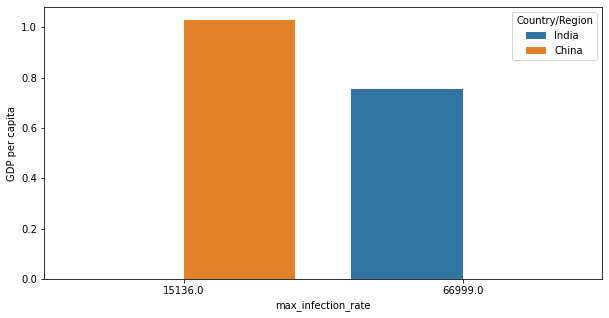

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='max_infection_rate',y='GDP per capita',hue=data2.index,data=data2);

In [33]:
#Plotting Social support vs maximum Infection rate

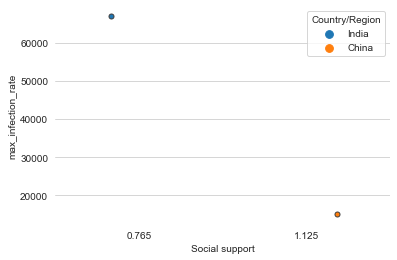

In [34]:
sns.set_style("whitegrid")
sns.stripplot(x='Social support',y='max_infection_rate',hue=data2.index,linewidth=1,data=data2,dodge=True);
sns.despine(left=True, bottom=True)

In [35]:
# Plotting Healthy life expectancy vs maximum Infection rate

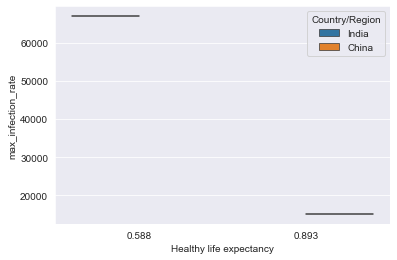

In [36]:
sns.set_style("darkgrid")
sns.violinplot(x='Healthy life expectancy',y='max_infection_rate',hue=data2.index,data=data2);

In [37]:
# Plotting Freedom to make life choices vs maximum Infection rate

sns.set_style('ticks')
sns.boxplot(x='Freedom to make life choices',y='max_infection_rate',hue=data2.index,data=data2);

# Based on the plot above, comment on the Indicators having strong relationship with COVID19 Infection?

In [38]:
#Conclusion = China having less number of cases in comparrion to India.There by Healthy life expectancy in china is also quite
#higher than India with GDP.
#Hence we can depict the relationship between India and China.